# Exercise 2: Solutions
General hint: You can always ask for help from within python if you forgot how a certain function works or what the correct ordering of input parameters is. Executing "some_function?" spawns the docstring of the function and "some_function??" the source code.

In [1]:
# scipy.stats.kurtosis?

## Probability density function (pdf)
We will look at a few common distributions and investigate their basic properties.

In [2]:
from __future__ import print_function
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

For your convenience, we define a few pdfs and functions to draw samples from them. Have a look at https://docs.scipy.org/doc/scipy/reference/stats.html for more details. 

In [3]:
def gaussian_pdf(x, mu, sigma):
    """Gaussian distribution with mean mu and standard deviation sigma"""
    return scipy.stats.norm.pdf(x, loc=mu, scale=sigma)

def gaussian_sample(number, mu, sigma):
    """Draw samples from a Gaussian distribution
    
    mu: mean
    sigma: standard deviation:
    number: number of samples to be drawn
    """
    return scipy.stats.norm.rvs(loc=mu, scale=sigma, size=number)

def lognormal_pdf(x, mu, sigma):
    return scipy.stats.lognorm.pdf(x, loc=0, scale=1, s=sigma)

def lognormal_sample(number, mu, sigma):
    return scipy.stats.lognorm.rvs(size=number, loc=0, s=sigma, scale=1)
    
def binomial_pmf(x, n, p):
    return scipy.stats.binom.pmf(x, n, p)

def binomial_sample(number, n, p):
    return scipy.stats.binom.rvs(n, p, size=number)

def poisson_pmf(k, mu):
    return scipy.stats.poisson.pmf(k, mu)

def poisson_sample(number, mu):
    return scipy.stats.poisson.rvs(mu, size=number)

**1a) Generate arrays from the lognormal and poisson pdfs and draw an array of samples from each distribution.**

In [4]:
# Generate arrays for parent pdf and samples
sample_size = 1000
x_float = np.linspace(0, 10, 1000)
x_int = np.arange(0, 30)
mu = 4.0
p = 0.5
sigma = 1

# Gaussian
g_parent = gaussian_pdf(x_float, mu, sigma)
g_sample = gaussian_sample(sample_size, mu, sigma)

# Lognormal
logn_parent = lognormal_pdf(x_float, mu, sigma)
logn_sample = lognormal_sample(sample_size, mu, sigma)

# Binomial
bin_pdf = binomial_pmf(x_int, n=int(mu/p), p=p)
bin_sample = binomial_sample(sample_size, n=int(mu/p), p=p)

# Poisson
pois_parent = poisson_pmf(x_int, mu=mu)
pois_sample = poisson_sample(sample_size, mu=mu)

**1b) Display your results in axes 1 and 3 in the figure below.**

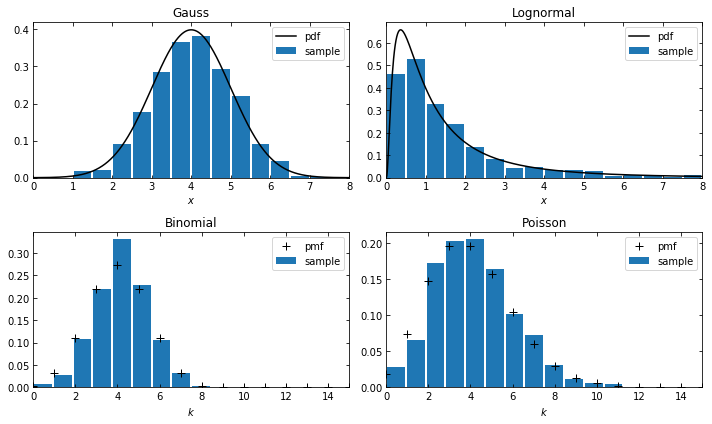

In [16]:
# Plot the generated arrays, comparing the parent distribution and a sample
f, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.flatten()
n_bins = 16

ax[0].set_title(r'Gauss')
ax[0].plot(x_float, g_parent, 'k', label='pdf')
ax[0].hist(g_sample, n_bins, normed=True, rwidth=0.9, label='sample', range=(0, 8))
ax[0].set_xlim(0, 8)
ax[0].set_xlabel(r'$x$')
ax[0].legend()

ax[1].set_title(r'Lognormal')
ax[1].plot(x_float, logn_parent, 'k', label='pdf')
ax[1].hist(logn_sample, n_bins, normed=True, rwidth=0.9, label='sample', range=(0, 8))
ax[1].legend()
ax[1].set_xlabel(r'$x$')
ax[1].set_xlim(0, 8)

ax[2].set_title('Binomial')
ax[2].plot(x_int, bin_pdf, 'k+', label='pmf', ms=8)
ax[2].hist(bin_sample, n_bins, normed=True, rwidth=0.9, label='sample', range=(0, 15), align='mid')
ax[2].set_xlim(0, 15)
ax[2].set_xlabel(r'$k$')
ax[2].legend()

ax[3].set_title('Poisson')
ax[3].plot(x_int, pois_parent, 'k+', label='pmf', ms=8)
ax[3].hist(pois_sample, n_bins, normed=True, rwidth=0.9, label='sample', range=(0, 15), align='mid')
ax[3].set_xlim(0, 15)
ax[3].set_xlabel(r'$k$')
ax[3].legend()

f.tight_layout()

# Note: Depending on you matplotlib version, the keyword for normalization is "density" or "normed"!

## Mean, variance and their estimators
**2a) To familiarize yourself with the properties of the distributions, write a function that calculates the first five moments of a sample as well as the mode and median values. Compare your results with the expected values.**  
Hints: If you like, you can try your own implementations and test them against scipy.stats.  You can find functions in numpy and scipy implementing all tasks. The 0th moment is just the total probability, following the convention in the lecture notes. Sometimes the value 3 is subtracted from kurtosis to shift a normal distribution to zero kurtosis.

In [23]:
def moments(sample):
    """Calculate the first 4 moments of a sample"""
    m0 = scipy.stats.moment(sample, 0)
    m1 = np.mean(sample)
    m2 = scipy.stats.moment(sample, 2)
    m3 = scipy.stats.skew(sample)
    m4 = scipy.stats.kurtosis(sample)
    return np.array([m0, m1, m2, m3, m4])

def mode(sample):
    return scipy.stats.mode(sample)[0][0]

def mode_sample(sample):
    h = np.histogram(sample, bins=15)
    return (h[1][np.argmax(h[0])]+h[1][np.argmax(h[0])+1])/2.0 if np.argmax(h[0]) < len(h[0])-1 else h[1][np.argmax(h[0])]

def median(sample):
    return np.median(sample)

In [24]:
print('Sample: \t mass, mean, variance, skewness, kurtosis')
print('Gaussian: \t', moments(g_sample).round(2))
print('Lognormal: \t', moments(logn_sample).round(2))
print('Binomial: \t', moments(bin_sample).round(2))
print('Poisson: \t', moments(pois_sample).round(2))

Sample: 	 mass, mean, variance, skewness, kurtosis
Gaussian: 	 [ 1.    4.03  1.04 -0.1  -0.05]
Lognormal: 	 [ 1.    1.68  4.46  4.05 24.39]
Binomial: 	 [ 1.    4.    1.89 -0.06 -0.  ]
Poisson: 	 [1.   3.98 4.2  0.55 0.42]


In [25]:
print(mode_sample(g_sample), median(g_sample))
print(mode_sample(logn_sample), median(logn_sample))
print(mode(bin_sample), median(bin_sample))
print(mode(pois_sample), median(pois_sample))

3.8596744792409305 4.05525317035419
0.7756969873870149 1.0424239898265104
4 4.0
4 4.0


What did you expect, knowing the parent distributions? Hint: scipy can also help you here, see for example "scipy.stats.norm.stats". You can check wikipedia to quickly recap some analytical results if neccessary.  
https://en.wikipedia.org/wiki/Normal_distribution  
https://en.wikipedia.org/wiki/Log-normal_distribution  
https://en.wikipedia.org/wiki/Binomial_distribution  
https://en.wikipedia.org/wiki/Poisson_distribution  
  

In [9]:
print(*scipy.stats.norm.stats(mu, sigma, moments='mvsk'))
print(*scipy.stats.lognorm.stats(loc=0, s=sigma, scale=1, moments='mvsk'))
print(*scipy.stats.binom.stats(n=mu/p, p=p, moments='mvsk'))
print(*scipy.stats.poisson.stats(mu=mu, moments='mvsk'))

4.0 1.0 0.0 0.0
1.6487212707001282 4.670774270471604 6.184877138632554 110.9363921763115
4.0 2.0 0.0 -0.25
4.0 4.0 0.5 0.25


### Estimation
Obviously, there is some discrepancy between the expected or "true" values from the parent distribution and the calculated sample moments. We would like to work on the inverse problem of guessing the first two moments given only a sample and knowing that the sample was drawn from a normal distribution (but not knowing its "true" parameters).  
**2b) Remember how to estimate the mean and variance from a sample.**   



The estimation of the mean coincides with the sample mean. The estimation for the variance is $n/(n-1)$ the sample variance.

**2c) How to quantify the uncertainty of the estimation of the mean?**    



Given $$\bar{x}=\frac{1}{N} \sum_{i=1}^{N}x_i$$ one can recover its uncertainty with the Gaussian error propagation formula: 
$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$$ with the sample variance estimation $$\sigma=\frac{1}{N-1}\sum (x_i - \bar{x})^2$$

In [10]:
N = np.size(g_sample)
mean = np.mean(g_sample)
uncertainty_mean = np.sqrt(1/(N-1) * np.sum((g_sample-mean)**2)) * 1/np.sqrt(N)
print('mean estimator:', mean)
print('uncertainty estimator:', uncertainty_mean)

mean estimator: 3.952626606381409
uncertainty estimator: 0.030539967040206582


**2d) Given that it can be very cheap to repeatedly sample a distribution with a computer, try to come up with an alternative approach to estimate the uncertainty of the mean. We will come back to this at the end of the course.**

In [11]:
# We just repeat sampling the distribution and calculate the standard deviations of the averages:
reps = 1000
averages = np.zeros(reps)
for i in range(reps):
    g_sample = gaussian_sample(sample_size, mu, sigma)
    averages[i] = np.mean(g_sample)
    
print(np.mean(averages))
print(np.std(averages, ddof=1))

4.001435884220608
0.033109197212323395


## Multidimensional pdf: covariance and correlation

Imagine your're an astronomer and are measuring a specific parameter called the "Clumping factor". You're interested whether the clumping factor varies with temperature and how. You have 8 measurements with the following values:

In [12]:
clumping = [0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.3, 0.2]
temperature = [2700, 4600, 5120, 5550, 3600, 3990, 4190, 3900] # [K]

**3a) Write a function in python that computes the Covariance and compare the result to a python numpy or scipy function.**  

In [13]:
def cov(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy = np.multiply(x,y)
    xy_mean = np.mean(xy)
    return xy_mean - x_mean*y_mean

print('naive implementation:', cov(clumping, temperature))
# Covariance matrix
print(np.cov(clumping, temperature, bias=True))
# Off-diagonal entry
print('numpy implementation:', np.cov(clumping, temperature, bias=True)[0, 1])

naive implementation: -53.28124999999977
[[ 9.37500000e-03 -5.32812500e+01]
 [-5.32812500e+01  6.96598438e+05]]
numpy implementation: -53.28125


**3b) Calculate the correlation coefficient.**  

In [14]:
def corr(x, y):
    return cov(x, y) / (np.var(x)*np.var(y))**(1/2)

print(corr(clumping, temperature))
print(np.corrcoef(clumping, temperature))

-0.6593219263134944
[[ 1.         -0.65932193]
 [-0.65932193  1.        ]]


**3c) Interpret your results of covariance and correlation coefficient.**  

The covariance tells us that the clumping factor increases with lower temperatures. This picture is confirmed by the correlation coefficient. It is negative, meaning there is an anti-correlation between the clumping factor and the temperature.

**3d) If the two variables are uncorrelated, does this also mean they are independent of each other?**  

No, the covariance only tells us about linear correlations. Consider for example $y=x^2$ on $[-1, 1]$.

In [15]:
x = np.linspace(-1, 1, 11)
y = x**2
print(np.corrcoef(x, y))

[[1.0000000e+00 1.8069255e-17]
 [1.8069255e-17 1.0000000e+00]]


## Bonus
### 3D Plots

Try playing with three dimensional graphs to visualize properties of pdfs with two variables. For example, try visualizing marginal and conditional distributions as was done in lecture 2.
<img src="MultivariateNormal.png" style="height:250px">

### nbextensions
There are some useful extensions to jupyter notebooks, check https://github.com/ipython-contrib/jupyter_contrib_nbextensions if you are interested. There are features like a table of contents to navigate around in notebooks, line numbering for all code cells and options to collapse certain cells to to keep a better overview.

conda install -c conda-forge jupyter_contrib_nbextensions
